In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [178]:
hourly_stat = pd.read_csv('hourly_stat.csv').dropna()
#hourly_stat

In [179]:
hourly_stat['Date'] = pd.to_datetime(hourly_stat['date'])


In [180]:
hourly_stat.set_index('Date', inplace=True)

In [181]:
hourly_stat[hourly_stat['Gas_sum'] < 0] = 0

In [182]:
hourly_stat

,date,Gas_sum,Gas_max,Gas_min,Gas_mean,ext_temp_max,ext_temp_min,ext_temp_mean,ext_hum_max,ext_hum_min,...,SH_temp_mean,SH_hum_max,SH_hum_min,SH_hum_mean,DWH_temp_max,DWH_temp_min,DWH_temp_mean,DWH_hum_max,DWH_hum_min,DWH_hum_mean
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-08 00:00:00,2020-03-08 00:00:00,0.080621,0.048621,0.032000,0.040310,10.100000,10.100000,10.100000,83.000000,82.666667,...,20.907591,53.957879,53.204083,53.580981,21.527065,21.357708,21.442387,49.417708,48.271957,48.844832
2020-03-08 01:00:00,2020-03-08 01:00:00,0.057000,0.032333,0.024667,0.028500,10.166667,10.033333,10.100000,85.000000,84.333333,...,20.494126,54.679370,54.429973,54.554672,21.183300,21.037000,21.110150,49.971400,49.740800,49.856100
2020-03-08 02:00:00,2020-03-08 02:00:00,0.057333,0.035333,0.022000,0.028667,10.200000,10.000000,10.100000,85.666667,84.000000,...,20.487254,55.010402,54.982286,54.996344,21.039000,20.913600,20.976300,51.145600,50.464000,50.804800
2020-03-08 03:00:00,2020-03-08 03:00:00,0.072000,0.043000,0.029000,0.036000,10.100000,9.966667,10.033333,81.666667,79.333333,...,20.365186,56.348934,55.838001,56.093468,20.755000,20.529783,20.642391,50.691250,50.689130,50.690190
2020-03-08 04:00:00,2020-03-08 04:00:00,0.051333,0.027667,0.023667,0.025667,9.733333,9.466667,9.600000,75.000000,73.000000,...,20.276276,55.544823,54.731292,55.138057,20.629130,20.623750,20.626440,50.171875,50.127174,50.149524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-02 04:00:00,2021-03-02 04:00:00,0.043333,0.025000,0.018333,0.021667,3.200000,2.900000,3.050000,79.666667,79.333333,...,19.664339,51.411650,51.376945,51.394298,20.586957,20.469545,20.528251,48.646522,48.528409,48.587465
2021-03-02 05:00:00,2021-03-02 05:00:00,0.038667,0.020000,0.018667,0.019333,2.633333,2.633333,2.633333,79.000000,79.000000,...,19.348004,51.565290,51.544731,51.555011,20.255217,20.084783,20.170000,48.218478,48.174130,48.196304
2021-03-02 06:00:00,2021-03-02 06:00:00,0.149000,0.094667,0.054333,0.074500,2.600000,2.600000,2.600000,79.333333,79.333333,...,19.302289,51.599304,51.250863,51.425083,20.041957,18.594545,19.318251,54.542273,48.485652,51.513962


In [183]:
hourly_stat=hourly_stat.dropna()


In [184]:
hourly_stat[ 'Gas_mean'].describe()

count    8312.000000
mean        0.050271
std         0.044725
min         0.000667
25%         0.015500
50%         0.034661
75%         0.074833
max         0.240500
Name: Gas_mean, dtype: float64

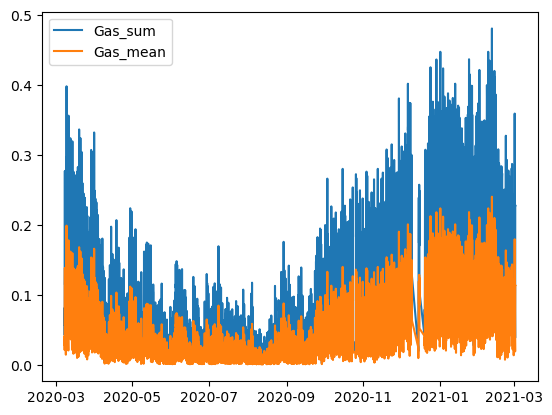

In [185]:
plt.plot(hourly_stat[ 'Gas_sum'], label='Gas_sum')

plt.plot(hourly_stat[ 'Gas_mean'], label='Gas_mean')

plt.legend()

plt.show()

# heating period outdoor method 

In [186]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['ext_temp_mean'] > 15:
        return 'DWH'
    else:
        return 'SH+DWH'



# Apply the function to create a new column
hourly_stat['Heating_Period'] = hourly_stat.apply(classify_heating_period, axis=1)

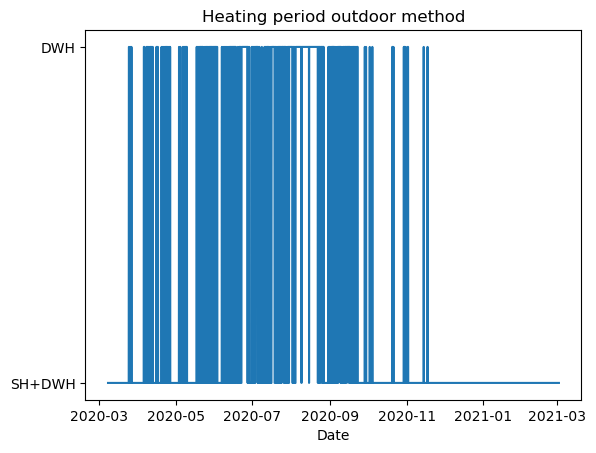

In [187]:
plt.plot(hourly_stat['Heating_Period'])
plt.title('Heating period outdoor method')
plt.xlabel('Date')

plt.show()

# heating period indoor method 

In [188]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['DWH_hum_mean'] > 50:
        return 'DWH'
    else:
        return 'SH'



# Apply the function to create a new column
hourly_stat['Heating_Period'] = hourly_stat.apply(classify_heating_period, axis=1)

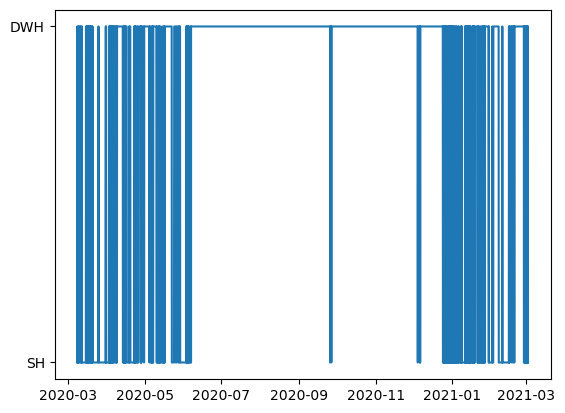

In [189]:
plt.plot(hourly_stat['Heating_Period'])
plt.show()

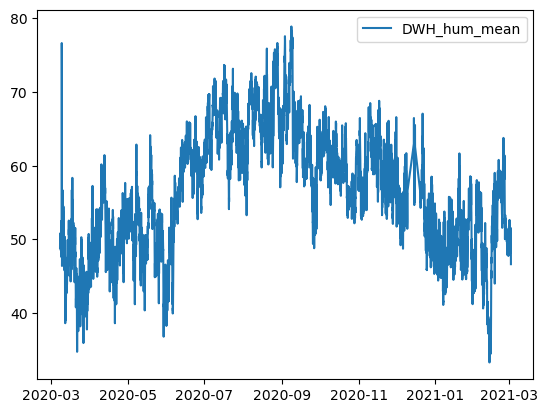

In [190]:
plt.plot(hourly_stat[ 'DWH_hum_mean'], label='DWH_hum_mean')

plt.legend()

plt.show()

In [191]:
baseline=hourly_stat[ 'DWH_hum_mean'].mean()
std_dev=hourly_stat[ 'DWH_hum_mean'].std()

In [192]:
threshold = baseline + 2 * std_dev  # Example: threshold set at mean + 2*std_dev
print(f'Threshold: {threshold}')


Threshold: 72.5678031756483


# moving threshold 

In [193]:
# Define window size (e.g., 30 minutes if data is at minute intervals)
window_size = 60

In [194]:
data=hourly_stat
# Calculate the moving average and standard deviation
data['moving_avg'] = hourly_stat['DWH_hum_mean'].rolling(window=window_size).mean()
data['moving_std'] = hourly_stat['DWH_hum_mean'].rolling(window=window_size).std()

# Calculate the moving threshold
threshold_factor = 2
data['moving_threshold'] = data['moving_avg'] + threshold_factor * data['moving_std']

# Drop NaN values resulting from the rolling calculation
data.dropna(inplace=True)

print(data['moving_threshold'])

Date
2020-03-10 11:00:00    63.332830
2020-03-10 12:00:00    63.391627
2020-03-10 13:00:00    63.431471
2020-03-10 14:00:00    63.440639
2020-03-10 15:00:00    63.441048
                         ...    
2021-03-02 04:00:00    51.869156
2021-03-02 05:00:00    51.863688
2021-03-02 06:00:00    51.947696
2021-03-02 07:00:00    51.961187
2021-03-02 08:00:00    52.019983
Name: moving_threshold, Length: 8253, dtype: float64


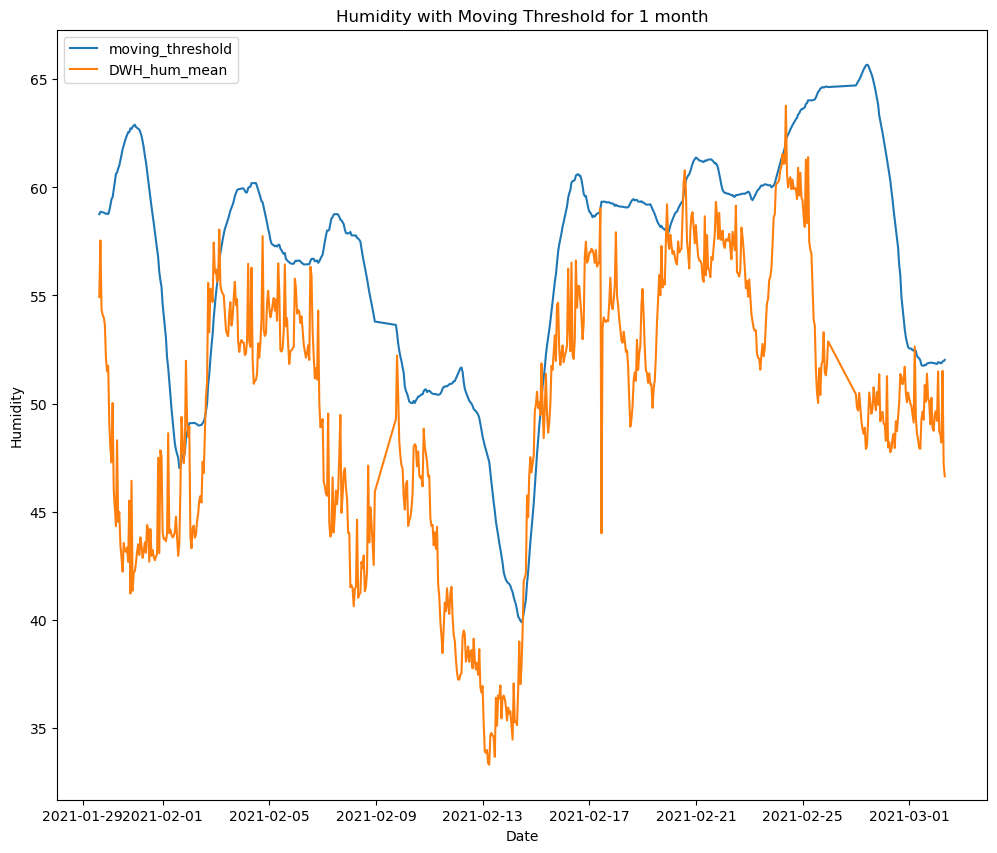

In [195]:
plt.figure(figsize=(12, 10))

plt.plot(data['moving_threshold'].tail(720), label='moving_threshold')
plt.plot(data[ 'DWH_hum_mean'].tail(720) ,label='DWH_hum_mean')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.title('Humidity with Moving Threshold for 1 month')
plt.legend()
plt.show()

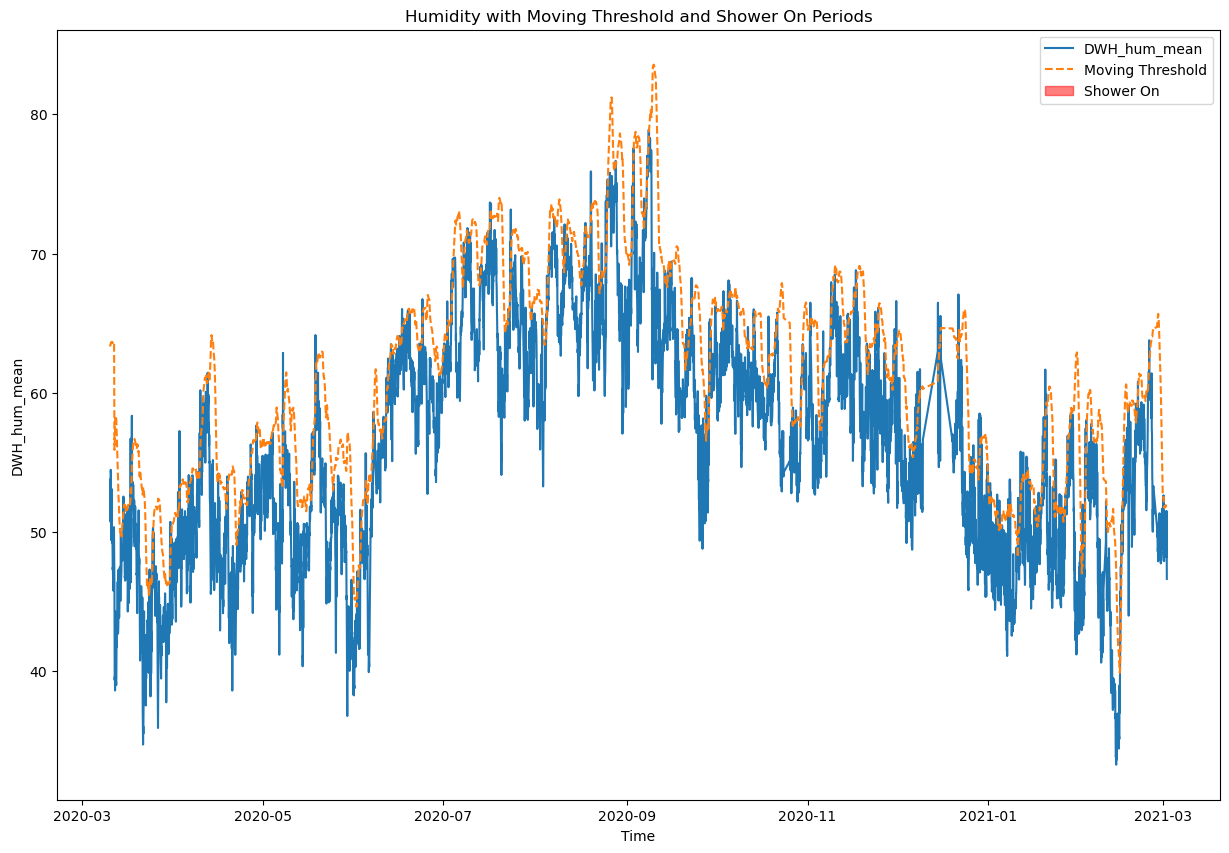

In [196]:
# Determine periods when the shower is on
data['shower_on'] = data['DWH_hum_mean'] > data['moving_threshold']

# Plotting with identified shower periods
plt.figure(figsize=(15, 10))
plt.plot(data.index, data['DWH_hum_mean'], label='DWH_hum_mean')
plt.plot(data.index, data['moving_threshold'], linestyle='--', label='Moving Threshold')
plt.fill_between(data.index, data['moving_threshold'], data['DWH_hum_mean'], where=data['shower_on'], color="red", alpha=0.5, label='Shower On')
plt.xlabel('Time')
plt.ylabel('DWH_hum_mean')
plt.title('Humidity with Moving Threshold and Shower On Periods')
plt.legend()
plt.show()


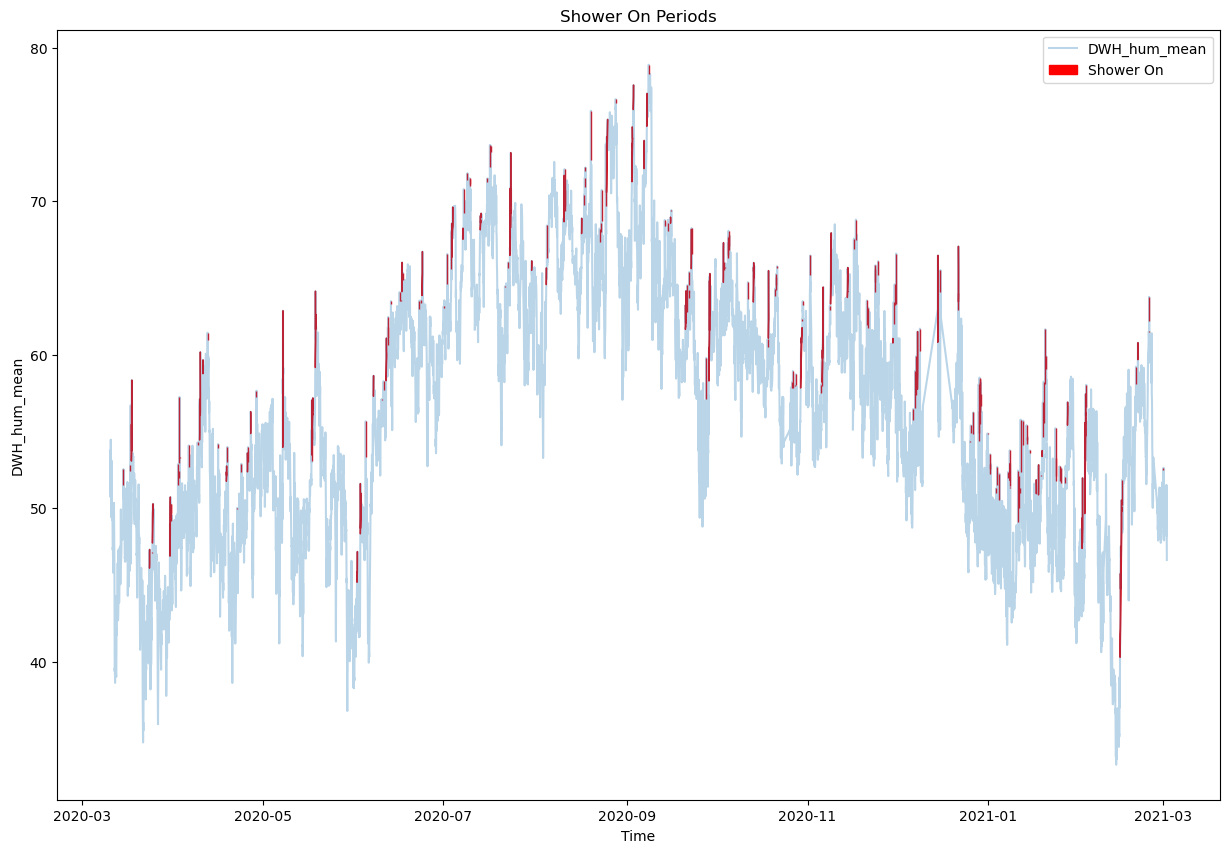

In [197]:
plt.figure(figsize=(15, 10))
plt.plot(data.index, data['DWH_hum_mean'], label='DWH_hum_mean',alpha=0.3)
plt.fill_between(data.index, data['moving_threshold'], data['DWH_hum_mean'], where=data['shower_on'], color='red', alpha=1, label='Shower On')
plt.xlabel('Time')
plt.ylabel('DWH_hum_mean')
plt.title('Shower On Periods')
plt.legend()
plt.show()

In [198]:

# Define the function to classify periods
def classify_heating_period(row):
    if row['DWH_hum_mean'] > row['moving_threshold']:
        return 'DWH'
    else:
        return 'SH'



# Apply the function to create a new column
hourly_stat['Heating_Period'] = hourly_stat.apply(classify_heating_period, axis=1)

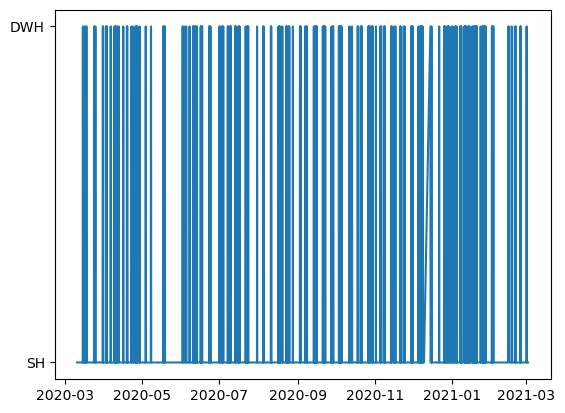

In [199]:
plt.plot(hourly_stat['Heating_Period'])
plt.show()

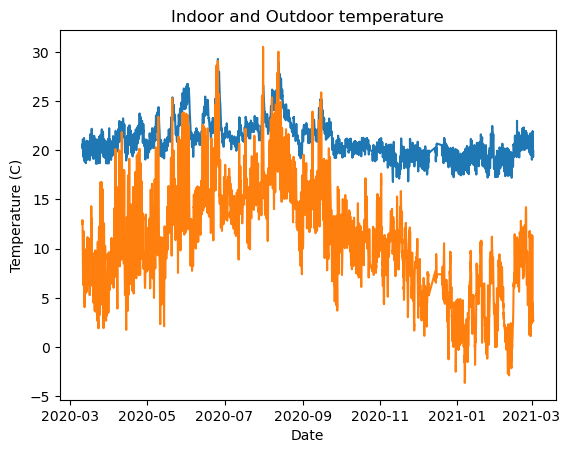

In [200]:

plt.plot(hourly_stat['SH_temp_mean'],label='Indoor temperature')
plt.plot(hourly_stat['ext_temp_mean'],label='Outdoor temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Indoor and Outdoor temperature')
plt.show()
